<a href="https://colab.research.google.com/github/Heramb0x1/Neural_Network_Model_Using_TensorFlow-KerasAPI-/blob/main/ANN_Health_Insurance_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Made By @Heramb.0X1
#DMs Are Open: https://www.linkedin.com/in/heramb0x1/

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Numerical Python (NumPy) : For Mathematical Operations, statistical Operation

In [ ]:
# pandas to read files of different format & for pre-processing

In [ ]:
 # matplotlib for visualization

In [ ]:
# Keras Packages
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
# For Regression model optimizers Root Mean Square Propogation (RMSprop.)
from tensorflow.keras.optimizers import RMSprop


In [ ]:
insurance_data = pd.read_csv("https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/insurance.csv")

In [ ]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
insurance_data.isnull().sum()
#This code is for checking is there any value empty or not feeded in

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
insurance_data['sex'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le_encoder = LabelEncoder()
insurance_data['sex'] = le_encoder.fit_transform(insurance_data['sex'])
# Label Encoder is used to normalize labels
# if u've got ordinal data & there is relational :> use label encoder

In [ ]:
le_encoder = LabelEncoder()
insurance_data['smoker'] = le_encoder.fit_transform(insurance_data['smoker'])

In [ ]:
le_encoder = LabelEncoder()
insurance_data['region'] = le_encoder.fit_transform(insurance_data['region'])

In [ ]:
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


<Axes: >

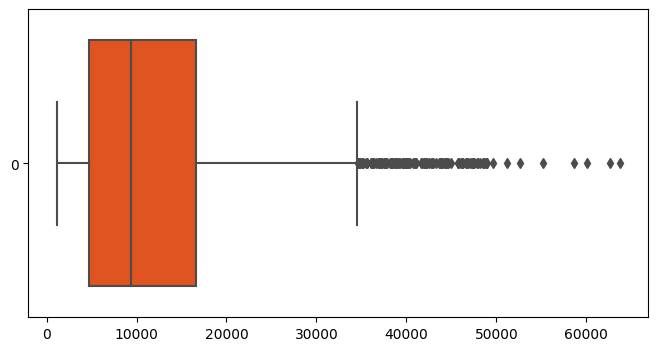

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(insurance_data['charges'], color = 'orangered', orient = 'h')

In [ ]:
X = insurance_data.drop(['charges'], axis = 1)
Y= insurance_data['charges']

In [ ]:
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


Handling Outliers

In [ ]:
from scipy.stats import zscore
z = np.abs(zscore(insurance_data['charges']))

In [ ]:
np.where(z > 3)

(array([  34,  543,  577,  819, 1146, 1230, 1300]),)

In [ ]:
insurance_data.drop(['charges'], axis = 1)

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


### Train And Test Data

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(X,Y,test_size = 0.2, random_state = 3)

####ANN Regressor Model

In [ ]:
def build_model():
  model = Sequential()
  # Input Layer
  model.add(Dense(units = 128, activation = 'relu', input_shape = [len(X.keys())]))
  # Hidden Layer - I
  model.add(Dense(units = 256, activation = 'relu'))
  # Hidden Layer - II
  model.add(Dense(units = 512, activation = 'relu'))
  # Hidden Layer - III
  model.add(Dense(units = 1))
  #Optimizer
  model.compile(loss = 'mean_squared_error', optimizer = 'RMSprop',
                metrics = ['mean_squared_error',
                           'mean_absolute_error'])
  return model

In [ ]:
 model = build_model()


In [ ]:
model.fit(x_train, y_train, epochs = 600, batch_size = 30,
          validation_split = 0.2)

Epoch 1/600
29/29 [==============================] - 2s 22ms/step - loss: 294260416.0000 - mean_squared_error: 294260416.0000 - mean_absolute_error: 12044.7227 - val_loss: 149931168.0000 - val_mean_squared_error: 149931168.0000 - val_mean_absolute_error: 7154.1807
Epoch 2/600
29/29 [==============================] - 0s 8ms/step - loss: 158902912.0000 - mean_squared_error: 158902912.0000 - mean_absolute_error: 8439.2930 - val_loss: 103314464.0000 - val_mean_squared_error: 103314464.0000 - val_mean_absolute_error: 8453.8252
Epoch 3/600
29/29 [==============================] - 0s 9ms/step - loss: 136052944.0000 - mean_squared_error: 136052944.0000 - mean_absolute_error: 9442.1162 - val_loss: 101905328.0000 - val_mean_squared_error: 101905328.0000 - val_mean_absolute_error: 8241.7070
Epoch 4/600
29/29 [==============================] - 0s 9ms/step - loss: 135919472.0000 - mean_squared_error: 135919472.0000 - mean_absolute_error: 9382.6836 - val_loss: 109296600.0000 - val_mean_squared_error

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               896       
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 512)               131584    
                                                                 
 dense_3 (Dense)             (None, 1)                 513       
                                                                 
Total params: 166017 (648.50 KB)
Trainable params: 166017 (648.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# epochs = num of iterations, batch_size = sample size per iteration,
# validation_split = 20% (model test size), validation is done while training of model
history = model.fit(x_train, y_train, epochs = 600, batch_size = 30, validation_split = 0.2)

Epoch 1/600
29/29 [==============================] - 1s 18ms/step - loss: 16655482.0000 - mean_squared_error: 16655482.0000 - mean_absolute_error: 2382.3782 - val_loss: 26386838.0000 - val_mean_squared_error: 26386838.0000 - val_mean_absolute_error: 3811.7615
Epoch 2/600
29/29 [==============================] - 0s 15ms/step - loss: 16000145.0000 - mean_squared_error: 16000144.0000 - mean_absolute_error: 2395.2620 - val_loss: 26262640.0000 - val_mean_squared_error: 26262640.0000 - val_mean_absolute_error: 3026.8735
Epoch 3/600
29/29 [==============================] - 1s 22ms/step - loss: 16760264.0000 - mean_squared_error: 16760264.0000 - mean_absolute_error: 2482.2283 - val_loss: 26773770.0000 - val_mean_squared_error: 26773770.0000 - val_mean_absolute_error: 3279.8435
Epoch 4/600
29/29 [==============================] - 0s 14ms/step - loss: 16538516.0000 - mean_squared_error: 16538516.0000 - mean_absolute_error: 2467.8342 - val_loss: 24210994.0000 - val_mean_squared_error: 24210994.00

In [ ]:
pd.DataFrame(history.history)

,loss,mean_squared_error,mean_absolute_error,val_loss,val_mean_squared_error,val_mean_absolute_error
0,16655482.0,16655482.0,2382.378174,26386838.0,26386838.0,3811.761475
1,16000145.0,16000144.0,2395.261963,26262640.0,26262640.0,3026.873535
2,16760264.0,16760264.0,2482.228271,26773770.0,26773770.0,3279.843506
3,16538516.0,16538516.0,2467.834229,24210994.0,24210994.0,2760.796631
4,17061778.0,17061778.0,2448.827148,25782152.0,25782152.0,2763.178711
...,...,...,...,...,...,...
595,13813016.0,13813016.0,2183.141602,26117440.0,26117440.0,2909.852295
596,13578869.0,13578869.0,2100.750244,29481900.0,29481900.0,3696.022461
597,13742783.0,13742783.0,2192.858643,33451608.0,33451608.0,3988.639893
598,13169029.0,13169029.0,2130.624512,26374288.0,26374286.0,3100.572754


<Axes: >

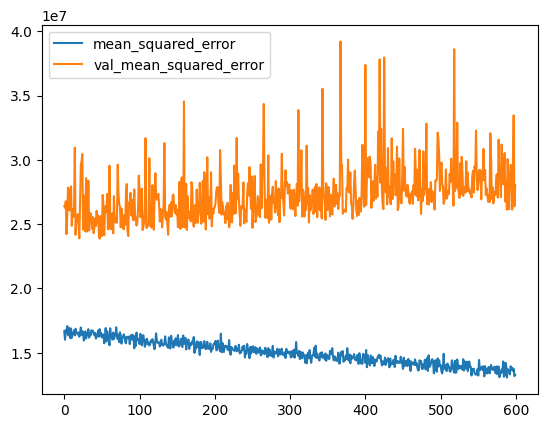

In [ ]:
pd.DataFrame(history.history)[['mean_squared_error','val_mean_squared_error']].plot()

In [ ]:
# Yhat
predictions = model.predict(x_test)

9/9 [==============================] - 0s 5ms/step


In [ ]:
from sklearn.metrics import r2_score
# 0-1
r2_score(y_test, predictions)

0.8230595639717678

In [ ]:
results = pd.DataFrame(predictions, columns = ['Predicted_Value'])

In [ ]:
results['Actual_Value'] = np.array(y_test)

<Axes: >

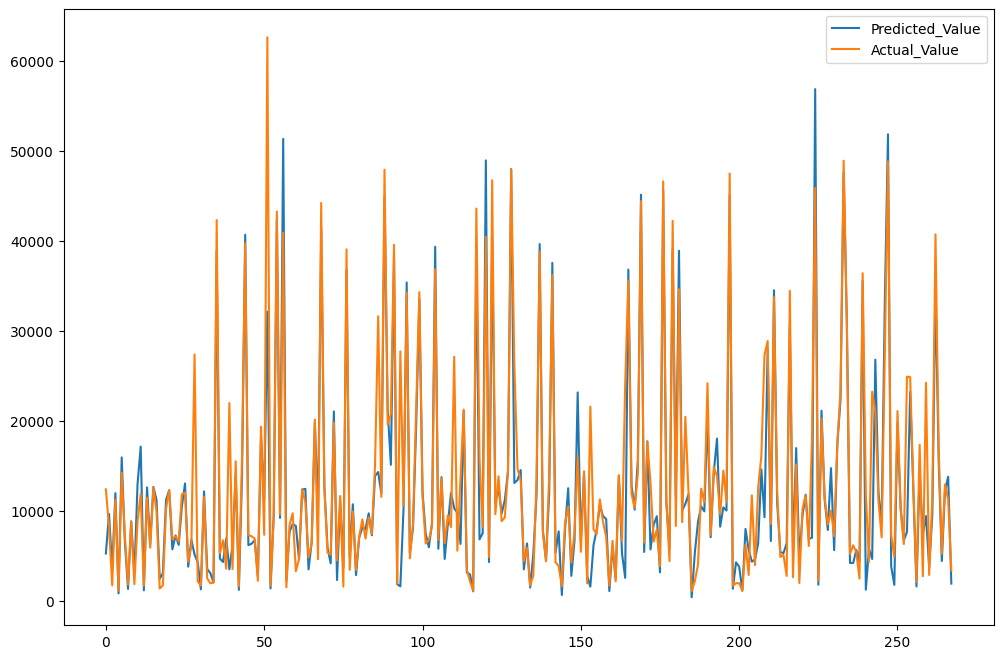

In [ ]:
results.plot(figsize=(12,8))